In [1]:
# Imports
import os

# Third-party imports
import pandas as pd
from dotenv import load_dotenv

import functions as f

In [2]:
# Load environment variables (stuff that doesn't change often)
load_dotenv()

API_KEY = os.getenv('FMPKEY')   

RF = (lambda x: x[0]["month3"] / 100)(f.get_treasury_data(API_KEY))  # 3 Month Treasury Rate

NUMBER_OF_PORTFOLIOS = 100  # Number of portfolios to simulate

TRADING_DAYS = 252  # Number of trading days in a year

In [3]:
# These need to be prompted at each run
current_portfolio = pd.read_csv('C:/Users/thomas.higginbotham/Downloads/PCRA_Trust-Positions.csv', skiprows=2)
#current_portfolio = pd.read_csv('C:/Users/thomas.higginbotham/OneDrive/PortfolioMagic/portfolio.csv')
#current_portfolio = pd.read_csv('/Users/thomashigginbotham/Library/CloudStorage/OneDrive-Personal/PortfolioMagic/portfolio.csv')

ACCT = float(current_portfolio['Market Value'].replace('[\$,]', '', regex=True).iloc[-1]) # Account balance
print(ACCT)

current_portfolio = current_portfolio[~current_portfolio['Symbol'].isin(['Cash & Cash Investments', 'Account Total'])] # Remove cash and total rows
current_portfolio = current_portfolio[['Symbol', 'Quantity']].rename(columns={'Quantity': 'Shares'})
current_portfolio['Shares'] = pd.to_numeric(current_portfolio['Shares'], errors='coerce')

STOCKS = current_portfolio['Symbol'].unique().tolist()
print(STOCKS)

RISK = 0.2  # Risk tolerance
NUMBER_OF_DAYS = 300  # Number of days to simulate (history)

7567.49
['EOG', 'MET', 'NVDA', 'TSLA', 'BULZ', 'EELV', 'EFG', 'EFV', 'FBL', 'FLSW', 'FNGO', 'FTEC', 'IFRA', 'IVE', 'MTUM', 'NVDL', 'SCHA', 'SCHX', 'SGDJ', 'SPDW', 'SPSM', 'SPYG', 'SQQQ', 'USMV', 'XES', 'XLB', 'XLE', 'XOP']


In [4]:
# Get the price history for all stocks and ETFs
stock_history = f.get_stock_history(STOCKS, NUMBER_OF_DAYS, API_KEY)

In [5]:
# Get the daily return (price difference) for all stocks and ETFs
return_stocks = f.get_return_stocks(stock_history)

In [6]:
portfolio_dfs = f.get_montecarlo_simulation(NUMBER_OF_PORTFOLIOS, STOCKS, return_stocks, TRADING_DAYS, RF, RISK)

In [7]:
recommendations = f.get_recommendations(portfolio_dfs, current_portfolio, ACCT, STOCKS, stock_history)

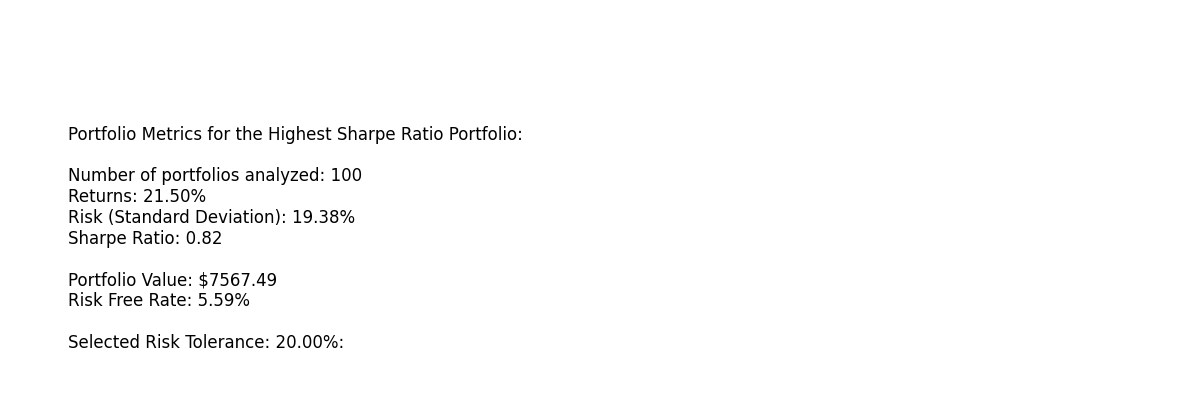

In [8]:
f.plot_portfolio_metrics(portfolio_dfs, NUMBER_OF_PORTFOLIOS, ACCT, RF, RISK)

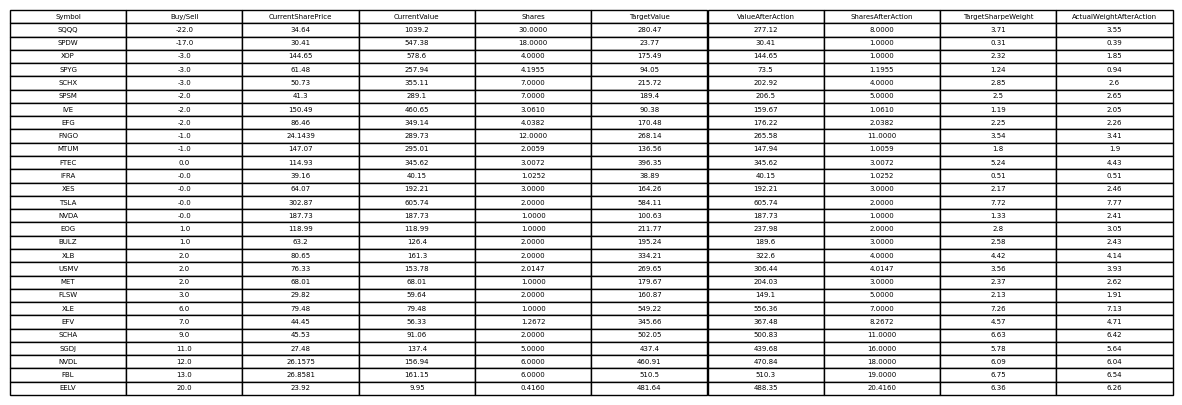

In [9]:
f.plot_portfolio_changes(recommendations)

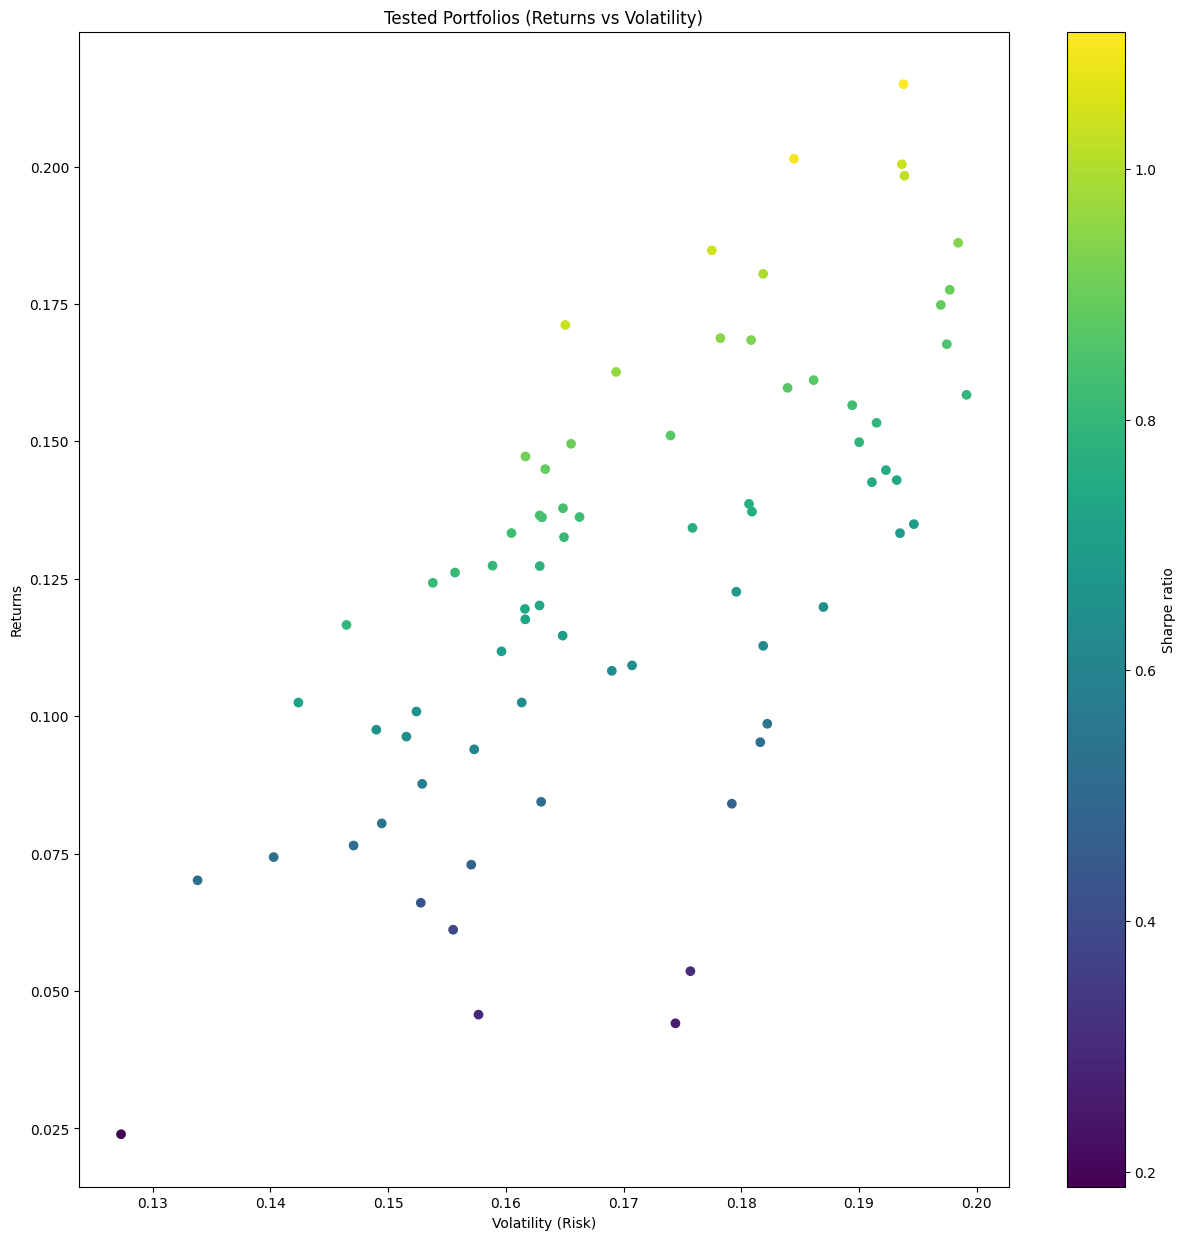

In [10]:
f.plot_risk_scatterplot(portfolio_dfs)

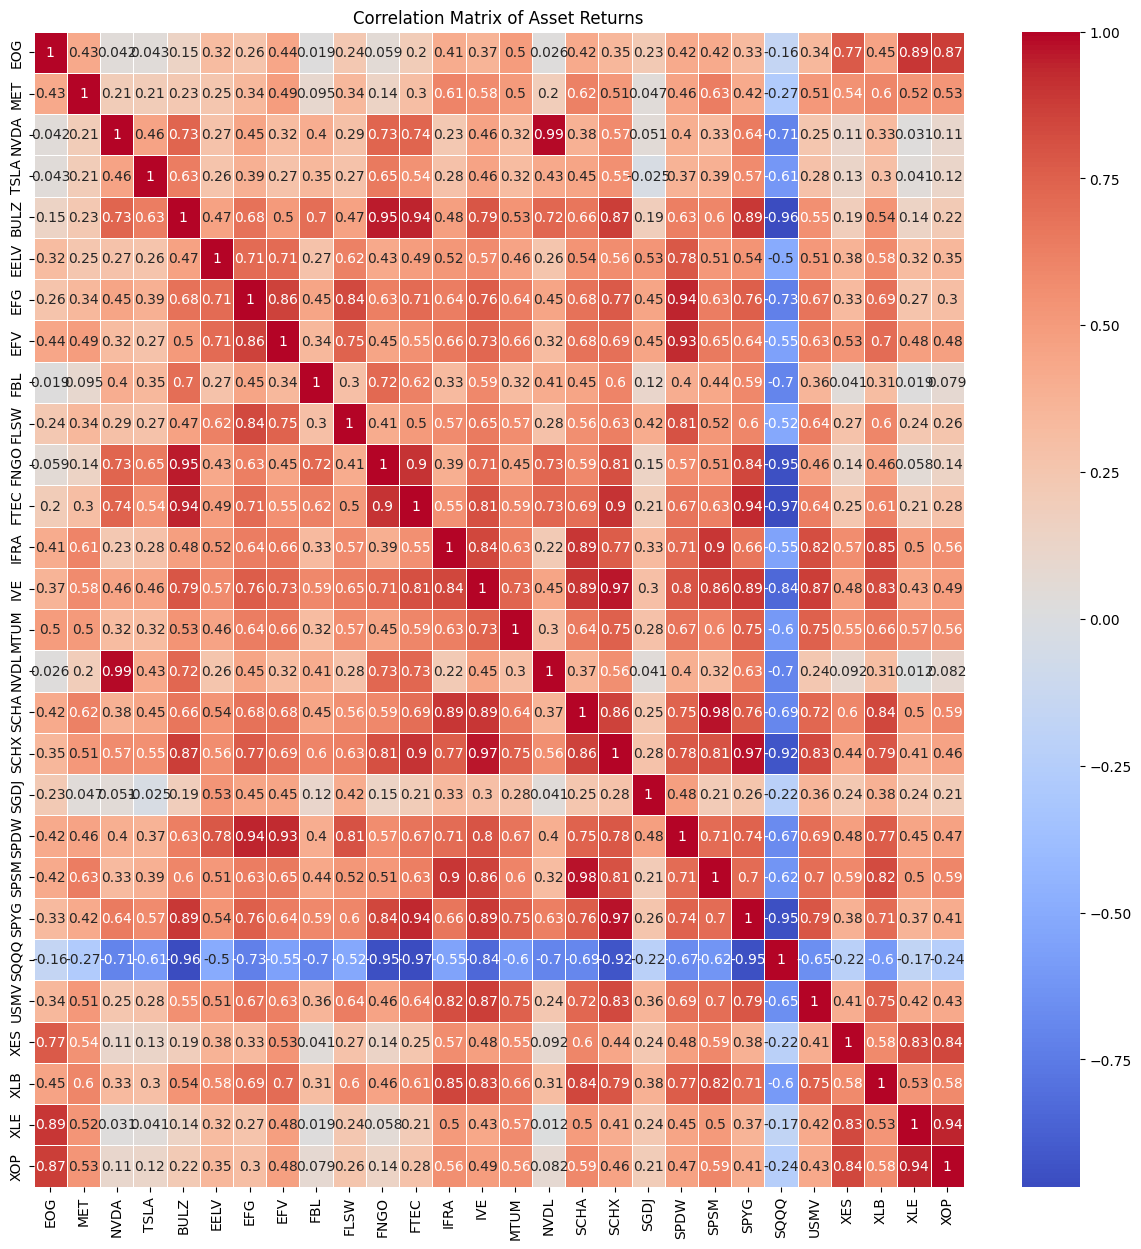

In [11]:
f.plot_correlation_matrix(return_stocks)